### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction import stop_words
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('bmh')

### Reading in CSV

In [4]:
col_fires_labeled = pd.read_csv('./Research Data/2012_Colorado_wildfires/2012_Colorado_wildfires-tweets_labeled.csv')

In [6]:
print(col_fires_labeled.shape)
col_fires_labeled.head()

(1200, 5)


,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness
0,211040709124440064,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related
1,211111710294163457,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related
2,211157222699433985,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related
3,211162553659830272,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related
4,211216962162933761,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related


In [7]:
fullcol_fires = pd.read_csv('./Research Data/2012_Colorado_wildfires/2012_Colorado_wildfires-tweetids_entire_period.csv')

In [8]:
print(fullcol_fires.shape)
fullcol_fires.head()

(4182, 3)


,Timestamp,Tweet-ID,Included(Y/N)
0,Fri Jun 08 06:22:06 +0000 2012,210980000776728576,Y
1,Fri Jun 08 07:42:10 +0000 2012,211000150196367360,Y
2,Fri Jun 08 10:23:20 +0000 2012,211040709124440064,Y
3,Fri Jun 08 12:01:32 +0000 2012,211065421984571393,Y
4,Fri Jun 08 12:40:41 +0000 2012,211075274413056000,Y


In [9]:
aus_fires_labeled = pd.read_csv('./Research Data/2013_Australia_bushfire/2013_Australia_bushfire-tweets_labeled.csv')

In [10]:
print(aus_fires_labeled.shape)
aus_fires_labeled.head()

(1199, 5)


,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness
0,388923108922781697,"It's ridiculous,,,RT @ThatGuyTiisetso: #redoct...",Not labeled,Not labeled,Not related
1,388929052247347200,A Total Fire Ban has been declared for the Gre...,Media,Caution and advice,Related and informative
2,388945930130841600,NSW National Parks &amp; Wildlife Service have...,Government,Caution and advice,Related and informative
3,388955358901067776,Fire Danger Update - Tomorrow signs will be on...,Government,Caution and advice,Related and informative
4,388970580026089472,This #RedOctober shit is just the beginning of...,Not labeled,Not labeled,Not related


## Stop Words

In [94]:
custom_stop = list(ENGLISH_STOP_WORDS)
colorado_omit = ['http','colorado','co','springs','waldo','canyon','cofire','rt','boulder','waldocanyonfire', 'highparkfire','denverpost','denver','colo']
custom_stop.extend(colorado_omit)

In [95]:
custom_stop

['at',
 'which',
 'them',
 'take',
 'to',
 'seemed',
 'whatever',
 'seems',
 'while',
 'else',
 'over',
 'go',
 'couldnt',
 'yet',
 'nevertheless',
 'have',
 'by',
 'everywhere',
 'except',
 'between',
 'only',
 'off',
 'through',
 'during',
 'alone',
 'behind',
 'these',
 'elsewhere',
 'detail',
 'myself',
 'somewhere',
 'even',
 'us',
 'done',
 'often',
 'until',
 'become',
 'fill',
 'with',
 'became',
 'six',
 'anyhow',
 'more',
 'first',
 'own',
 'who',
 'anyone',
 'she',
 'but',
 'empty',
 'again',
 'hundred',
 'or',
 'besides',
 'its',
 'somehow',
 'is',
 'someone',
 'the',
 'every',
 'hence',
 'same',
 'few',
 'our',
 'they',
 'was',
 'not',
 'top',
 'mill',
 'neither',
 'though',
 'show',
 'hers',
 'mostly',
 'made',
 'others',
 'eg',
 'nobody',
 'whose',
 'co',
 'something',
 'upon',
 'always',
 'ie',
 'would',
 'cant',
 'because',
 'yourselves',
 'find',
 'then',
 'one',
 'whole',
 'forty',
 'against',
 'him',
 'full',
 'thin',
 'moreover',
 'toward',
 'therefore',
 'de',
 'm

## Analyzing Colorado Wildfires Dataset - 2012

In [24]:
col_fires_labeled.columns

Index(['Tweet ID', ' Tweet Text', ' Information Source', ' Information Type',
       ' Informativeness'],
      dtype='object')

In [29]:
col_fires_labeled.columns = [col.strip() for col in col_fires_labeled.columns]

In [32]:
col_fires_labeled['Information Type'].value_counts()

Other Useful Information        426
Not labeled                     247
Sympathy and support            172
Affected individuals            151
Donations and volunteering       78
Infrastructure and utilities     71
Caution and advice               45
Not applicable                   10
Name: Information Type, dtype: int64

In [33]:
col_fires_labeled['Informativeness'].value_counts()

Related and informative          685
Related - but not informative    268
Not related                      238
Not applicable                     9
Name: Informativeness, dtype: int64

In [44]:
mask = col_fires_labeled['Informativeness'] == 'Related and informative'

In [47]:
relevant = col_fires_labeled[mask]

In [96]:
# Initialize the CountVectorizer
cvec = CountVectorizer(ngram_range=(1,1), stop_words=custom_stop)

In [97]:
word_matrix = cvec.fit_transform(relevant['Tweet Text'], )

In [98]:
# This is the number of unique words, exluding the limitations we initially put in
len(cvec.get_feature_names())

2607

In [99]:
word_df = pd.DataFrame(
        word_matrix.toarray(), columns=cvec.get_feature_names())

word_df.head()

,00,000,002eni0t,02uepaxr,039,0452,050,051057,07,08,...,zh5trlyg,zky8almm,zmqaf3wi,zoebfox,zones,zoxvrktm,ztttjqy9,zy60ydsu,zz7gxdat,zzmxori0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Let's use dictionary comprehension to create a dictionary of summed words
freq_dict = {word: word_df[word].sum() for word in cvec.get_feature_names()}

In [101]:
# Create a dataframe with index = 'counts'
freq_df = pd.DataFrame(freq_dict, index=['counts'])

# Transpose the dataframe
freq_df = freq_df.T

In [102]:
# Look at the head of the dataframe
freq_df.sort_values(by='counts', ascending=False).head(50)

,counts
wildfire,192
wildfires,98
homes,77
fires,58
000,50
news,40
park,37
acres,35
help,35
new,34


In [55]:
# top_20 = list(freq_df.sort_values(by='counts', ascending=False).head(20).index)

In [56]:
# top_20

['colorado',
 'co',
 'http',
 'rt',
 'the',
 'in',
 'fire',
 'of',
 'wildfire',
 'to',
 'springs',
 'highparkfire',
 'is',
 'wildfires',
 'from',
 'on',
 'for',
 'and',
 'homes',
 'fires']

### Sentiment Analysis

In [103]:
# instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [104]:
# Write a function to get the compound sentiment scores for a post
def sent_compound(text):
    return sia.polarity_scores(text)['compound']

In [105]:
# apply the function to the entire df
relevant['sentiment'] = relevant['Tweet Text'].apply(sent_compound)

/Users/DMay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


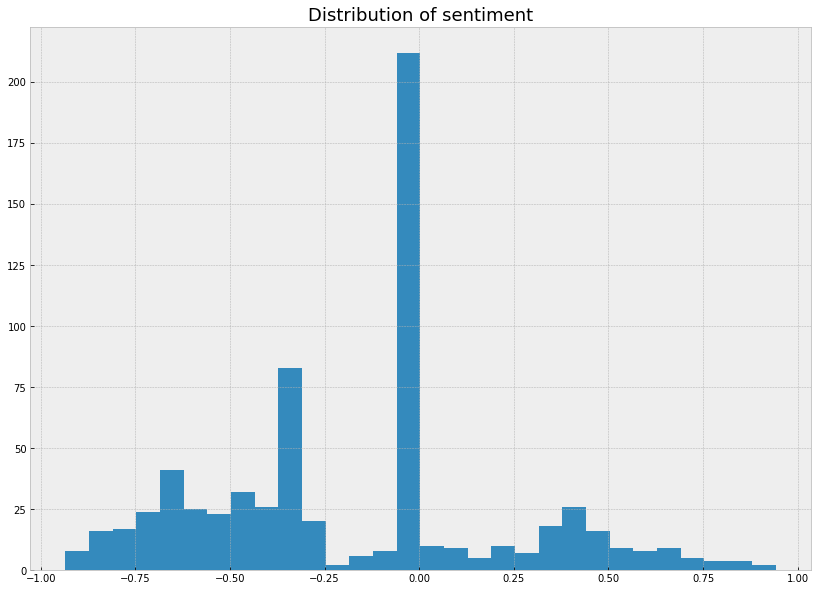

In [107]:
plt.figure(figsize=(14,10))
relevant['sentiment'].hist(bins=30);
plt.title("Distribution of sentiment", fontsize = 18);
# plt.legend(['fantasy football', 'nfl']);

## Analyzing Australia Bushfires Dataset - 2013

In [34]:
aus_fires_labeled.columns

Index(['Tweet ID', ' Tweet Text', ' Information Source', ' Information Type',
       ' Informativeness'],
      dtype='object')

In [35]:
aus_fires_labeled.columns = [col.strip() for col in aus_fires_labeled.columns]

In [59]:
aus_fires_labeled['Information Type'].value_counts()

Other Useful Information        378
Not labeled                     250
Caution and advice              202
Sympathy and support            161
Affected individuals             75
Infrastructure and utilities     73
Donations and volunteering       41
Not applicable                   19
Name: Information Type, dtype: int64

In [60]:
aus_fires_labeled['Informativeness'].value_counts()

Related and informative          704
Related - but not informative    245
Not related                      242
Not applicable                     8
Name: Informativeness, dtype: int64

In [61]:
mask = aus_fires_labeled['Informativeness'] == 'Related and informative'

In [62]:
relevant2 = aus_fires_labeled[mask]

In [64]:
# Initialize the CountVectorizer
cvec2 = CountVectorizer(ngram_range=(1,1))

word_matrix2 = cvec2.fit_transform(relevant2['Tweet Text'])

# This is the number of unique words, exluding the limitations we initially put in
len(cvec2.get_feature_names())

word_df2 = pd.DataFrame(
        word_matrix2.toarray(), columns=cvec2.get_feature_names())

word_df2.head()

# Let's use dictionary comprehension to create a dictionary of summed words
freq_dict2 = {word: word_df2[word].sum() for word in cvec2.get_feature_names()}

# Create a dataframe with index = 'counts'
freq_df2 = pd.DataFrame(freq_dict2, index=['counts'])

# Transpose the dataframe
freq_df2 = freq_df2.T

# Look at the head of the dataframe
freq_df2.sort_values(by='counts', ascending=False).head(50)

,counts
http,504
co,464
rt,404
nswfires,351
the,322
fire,264
in,250
to,244
of,230
fires,228


### Relabeling

In [109]:
col_fires_labeled['target'] = np.where(col_fires_labeled['Informativeness'] == 'Related and informative', 1, 0)
col_fires_labeled['target'].value_counts()

1    685
0    515
Name: target, dtype: int64

In [111]:
col_fires_labeled

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,target
0,211040709124440064,#Intern #US #TATTOO #Wisconsin #Ohio #NC #PA #...,Not labeled,Not labeled,Not related,0
1,211111710294163457,RT @Jack4Ward: Get in on the fun every Thursda...,Not labeled,Not labeled,Not related,0
2,211157222699433985,Welcome to our newest STUDENTathlete- Reagan B...,Not labeled,Not labeled,Not related,0
3,211162553659830272,Denver Post: #Colorado governor signs bill cre...,Not labeled,Not labeled,Not related,0
4,211216962162933761,Pretty sure I'm going to live in Manitou Sprin...,Not labeled,Not labeled,Not related,0
...,...,...,...,...,...,...
1195,222044755075416064,Colorado’s Waldo Canyon Fire reaches 98% conta...,Media,Other Useful Information,Related and informative,1
1196,222071430857244672,RT @cnnbrk: Colorado governor lifts statewide ...,Media,Other Useful Information,Related and informative,1
1197,222071921586606080,#SiguemeYTeSigo Colorado governor lifts statew...,Media,Infrastructure and utilities,Related and informative,1
1198,222082147291369472,RT @News1130radio: BC Wildfire Management says...,Media,Other Useful Information,Related and informative,1


In [117]:
new_df = col_fires_labeled[['Tweet ID', 'Tweet Text', 'target']]

In [118]:
new_df.to_csv('./Colorado tweets & target.csv', index=False)